In [1]:
%%capture
%cd ..
from pprint import pprint
import matplotlib.pyplot as plt
import json, math

# Importing

In [2]:
from func.api import Benchmark

In [3]:
bench_dir = "cached/six_datasets_lw.json"
bench = Benchmark(bench_dir, cache=False)

==&gt; Loading data...
==&gt; No cached data found or cache set to False.
==&gt; Reading json data...
==&gt; Done.


# API exploration

### Queryable tags

Tags starting with "Train/" indicate metrics which are logged every epoch.

In [4]:
queriable_tags = bench.get_queriable_tags()
pprint(queriable_tags)

[&#39;time&#39;,
 &#39;epoch&#39;,
 &#39;Train/loss&#39;,
 &#39;Train/train_accuracy&#39;,
 &#39;Train/val_accuracy&#39;,
 &#39;Train/train_cross_entropy&#39;,
 &#39;Train/val_cross_entropy&#39;,
 &#39;Train/train_balanced_accuracy&#39;,
 &#39;Train/val_balanced_accuracy&#39;,
 &#39;Train/test_result&#39;,
 &#39;Train/test_cross_entropy&#39;,
 &#39;Train/test_balanced_accuracy&#39;,
 &#39;Train/lr&#39;,
 &#39;model_parameters&#39;,
 &#39;final_train_cross_entropy&#39;,
 &#39;final_train_accuracy&#39;,
 &#39;final_train_balanced_accuracy&#39;,
 &#39;final_val_cross_entropy&#39;,
 &#39;final_val_accuracy&#39;,
 &#39;final_val_balanced_accuracy&#39;,
 &#39;final_test_cross_entropy&#39;,
 &#39;final_test_accuracy&#39;,
 &#39;final_test_balanced_accuracy&#39;,
 &#39;OpenML_task_id&#39;,
 &#39;test_split&#39;,
 &#39;budget&#39;,
 &#39;seed&#39;,
 &#39;instances&#39;,
 &#39;classes&#39;,
 &#39;features&#39;,
 &#39;batch_size&#39;,
 &#39;imputation_strategy&#39;,
 &#39;learning_rate_scheduler&

### Datasets

In [5]:
dataset_names = bench.get_dataset_names()
openml_task_ids = bench.get_openml_task_ids()

print(dataset_names)
print(openml_task_ids)

[&#39;Fashion-MNIST&#39;, &#39;adult&#39;, &#39;higgs&#39;, &#39;jasmine&#39;, &#39;vehicle&#39;, &#39;volkert&#39;]
[189908, 126025, 167200, 189862, 167168, 168331]


### Querying

In [6]:
# Get an example for a loss log
example_loss = bench.query(dataset_name="higgs", tag="Train/loss", config_id=0)

# Get the log of the accuracy for the run with the best peak accuracy
example_best_acc = bench.query_best("higgs", "Train/val_accuracy", "Train/val_accuracy", 0)

# Get the configuration of the best performing configuration
example_best_config = bench.query_best("higgs", "config", "Train/val_accuracy", 1)

print("Example loss log:\n", example_loss)
print("Best validation accuracy log:\n", example_best_acc)
print("Best config with regard to validation accuracy:\n", example_best_config)

Example loss log:
 [0.7022241950035095, 0.6901828646659851, 0.6828941702842712, 0.6783701181411743, 0.674620509147644, 0.6713433265686035, 0.6683977246284485, 0.6656985878944397, 0.6632551550865173, 0.6610167622566223, 0.6589627861976624, 0.6570730805397034, 0.6553987860679626, 0.6539356708526611, 0.6525501608848572, 0.6513078808784485, 0.650172233581543, 0.6491538882255554, 0.648234486579895, 0.6474276185035706, 0.6466533541679382, 0.6459929347038269, 0.6453624367713928, 0.6447970271110535, 0.6442720890045166, 0.6438338160514832, 0.6434042453765869, 0.6430007815361023, 0.6426441669464111, 0.6423296928405762, 0.6420345306396484, 0.6417556405067444, 0.6414902806282043, 0.6412926912307739, 0.6411048173904419, 0.6409232020378113, 0.6407663822174072, 0.6406413316726685, 0.6405110359191895, 0.640395998954773, 0.6403017640113831, 0.6402287483215332, 0.6401697993278503, 0.6400859951972961, 0.6400653719902039, 0.6400305032730103, 0.6400076746940613, 0.6399728059768677, 0.6399630904197693, 0.63

In [7]:
best_higgs = []
best_fashion = []
best_vehicle = []
best_volkert = []
best_adult = []
best_jasmine = []
for i in range(100):
    best_higgs.append(bench.query_best("higgs", "config", "Train/val_accuracy", i))
for i in range(100):
    best_fashion.append(bench.query_best("Fashion-MNIST", "config", "Train/val_accuracy", i))
for i in range(100):
    best_vehicle.append(bench.query_best("vehicle", "config", "Train/val_accuracy", i))
for i in range(100):
    best_volkert.append(bench.query_best("volkert", "config", "Train/val_accuracy", i))
for i in range(100):
    best_adult.append(bench.query_best("adult", "config", "Train/val_accuracy", i))
for i in range(100):
    best_jasmine.append(bench.query_best("jasmine", "config", "Train/val_accuracy", i))


### Plotting

The _plot\__by\__name_ method allows you to quickly look at some logs for a number of datasets.

In [8]:
help(bench.plot_by_name)

Help on method plot_by_name in module func.api:

plot_by_name(dataset_names, x_col, y_col, n_configs=10, show_best=False, xscale=&#39;linear&#39;, yscale=&#39;linear&#39;, criterion=None) method of func.api.Benchmark instance
    Plot multiple datasets and multiple runs.
    
    Keyword arguments:
    dataset_names -- list
    x_col -- str, tag to plot on x-axis
    y_col -- str, tag to plot on y-axis
    n_configs -- int, number of configs to plot for each dataset
    show_best -- bool, weather to show the n_configs best (according to query_best())
    xscale -- str, set xscale, options as in matplotlib: &quot;linear&quot;, &quot;log&quot;, &quot;symlog&quot;, &quot;logit&quot;, ...
    yscale -- str, set yscale, options as in matplotlib: &quot;linear&quot;, &quot;log&quot;, &quot;symlog&quot;, &quot;logit&quot;, ...
    criterion -- str, tag used as criterion for query_best()



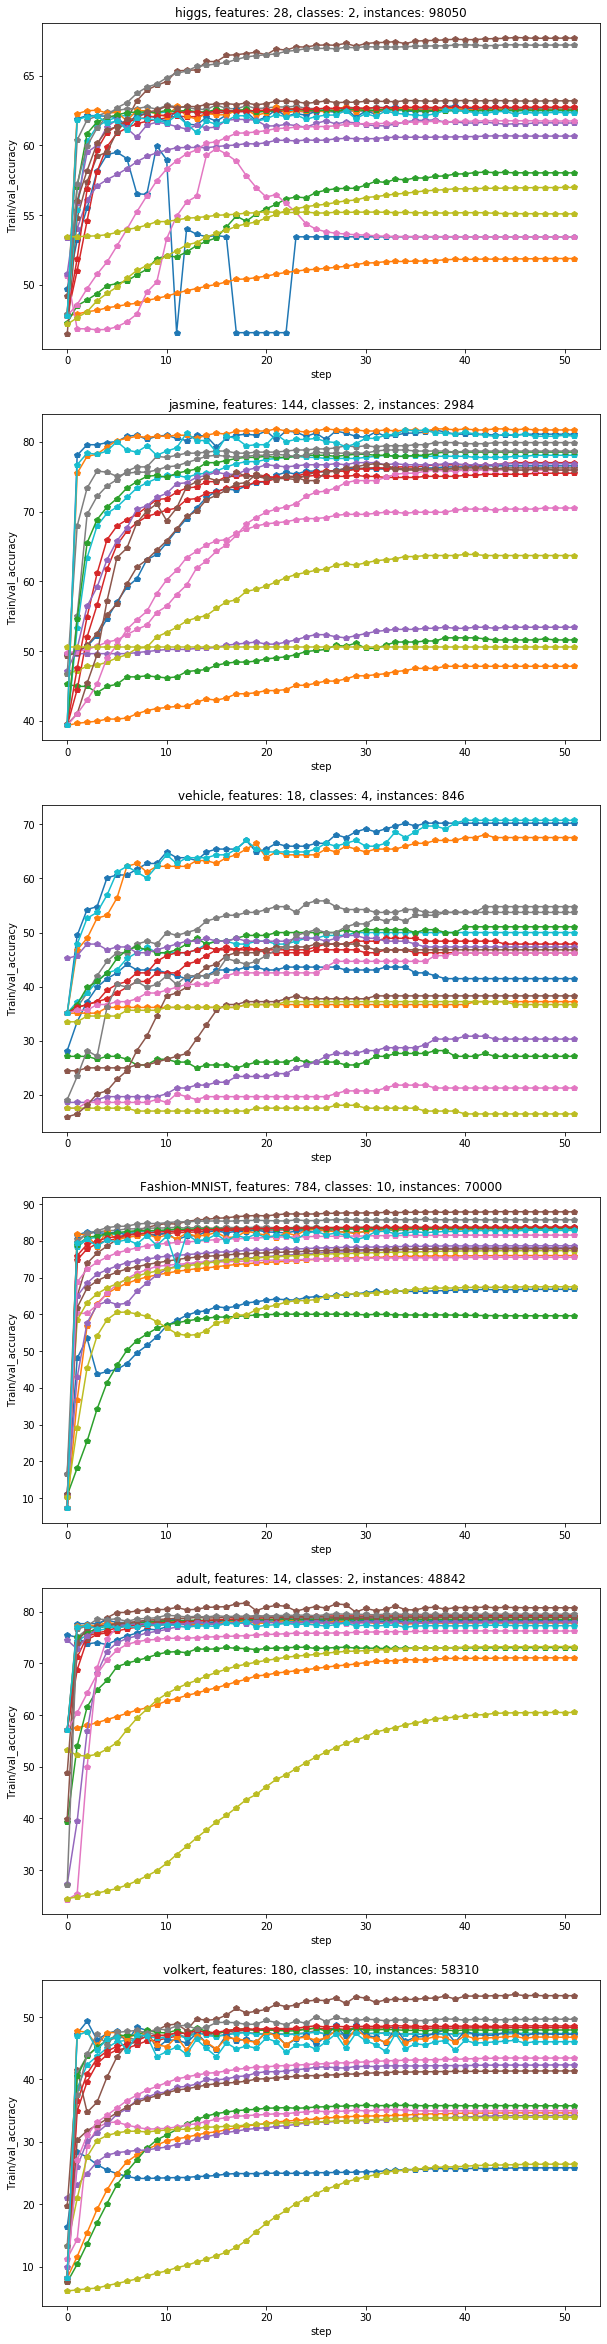

In [9]:
bench.plot_by_name(dataset_names=["higgs", "jasmine", "vehicle", 'Fashion-MNIST', 'adult','volkert'],
                   x_col="epoch",
                   y_col="Train/val_accuracy",
                   n_configs=20,
                   xscale='linear',
                   yscale='linear',
                   show_best=False)

In [10]:
with open("cached/metafeatures.json", "r") as f:
    metafeatures = json.load(f)

In [11]:
metafeatures6datasets = dict()
for dataset_name in dataset_names:
    print(dataset_name + ": ")
    dataset_dict = dict()
    iterator = iter(metafeatures[dataset_name].items())
    for _ind in range(len(metafeatures[dataset_name])):
        feature, value = iterator.__next__()
        dataset_dict[feature] = value
    metafeatures6datasets[dataset_name] = dataset_dict

Fashion-MNIST: 
adult: 
higgs: 
jasmine: 
vehicle: 
volkert: 
